In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [2]:
from nachbarstrom import LocalImgDataProvider
from tf_unet import unet
from tf_unet import util

In [3]:
basedir = "/home/tomas_ruiz_te_gmail_com/labelbox-download/"
generator = LocalImgDataProvider(basedir=basedir)

In [4]:
x_test, y_test = generator(1)

In [5]:
y_test[:,:,].shape

(1, 640, 640, 2)

Text(0.5,1,'Unusable Area')

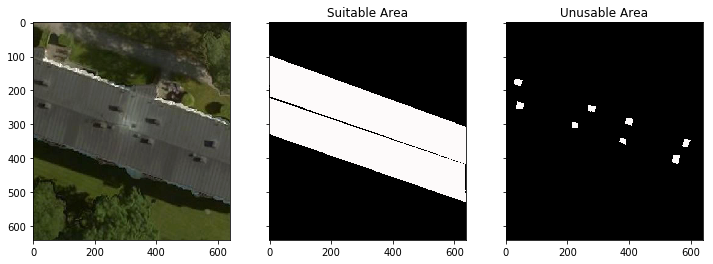

In [6]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,4))
ax[0].imshow(x_test[0,...], aspect="auto")
ax[1].imshow(y_test[0,...,0], aspect="auto"); ax[1].set_title("Suitable Area")
ax[2].imshow(y_test[0,...,1], aspect="auto"); ax[2].set_title("Unusable Area")

In [7]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=5, features_root=32, cost="dice_coefficient")

2018-09-06 16:32:53,220 Layers 5, features 32, filter size 3x3, pool size: 2x2


In [8]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [9]:
path = trainer.train(generator, "./unet_trained", training_iters=10, epochs=100, display_step=5, restore=False)

2018-09-06 16:32:56,587 Removing '/home/tomas_ruiz_te_gmail_com/python-nachbarstrom-dl-unet/demo/prediction'
2018-09-06 16:32:56,593 Removing '/home/tomas_ruiz_te_gmail_com/python-nachbarstrom-dl-unet/demo/unet_trained'
2018-09-06 16:32:56,594 Allocating '/home/tomas_ruiz_te_gmail_com/python-nachbarstrom-dl-unet/demo/prediction'
2018-09-06 16:32:56,595 Allocating '/home/tomas_ruiz_te_gmail_com/python-nachbarstrom-dl-unet/demo/unet_trained'
2018-09-06 16:33:03,816 Verification error= 100.0%, loss= -0.2700
2018-09-06 16:33:04,639 Start optimization
2018-09-06 16:33:14,521 Iter 0, Minibatch Loss= -0.3164, Training Accuracy= 0.9999, Minibatch error= 0.0%
2018-09-06 16:33:18,653 Iter 5, Minibatch Loss= -0.4986, Training Accuracy= 0.9997, Minibatch error= 0.0%
2018-09-06 16:33:20,833 Epoch 0, Average loss: -0.3931, learning rate: 0.2000
2018-09-06 16:33:21,688 Verification error= 0.0%, loss= -0.4567
2018-09-06 16:33:24,217 Iter 10, Minibatch Loss= -0.5039, Training Accuracy= 1.0000, Minibatc

2018-09-06 16:36:54,578 Epoch 21, Average loss: -0.5754, learning rate: 0.0681
2018-09-06 16:36:55,436 Verification error= 0.0%, loss= -0.5126
2018-09-06 16:36:58,711 Iter 220, Minibatch Loss= -0.5356, Training Accuracy= 1.0000, Minibatch error= 0.0%
2018-09-06 16:37:02,607 Iter 225, Minibatch Loss= -0.6819, Training Accuracy= 0.9984, Minibatch error= 0.2%
2018-09-06 16:37:04,785 Epoch 22, Average loss: -0.4848, learning rate: 0.0647
2018-09-06 16:37:05,632 Verification error= 0.0%, loss= -0.5126
2018-09-06 16:37:08,780 Iter 230, Minibatch Loss= -0.4730, Training Accuracy= 1.0000, Minibatch error= 0.0%
2018-09-06 16:37:12,725 Iter 235, Minibatch Loss= -0.4103, Training Accuracy= 0.9994, Minibatch error= 0.1%
2018-09-06 16:37:14,896 Epoch 23, Average loss: -0.5262, learning rate: 0.0615
2018-09-06 16:37:15,744 Verification error= 0.0%, loss= -0.5126
2018-09-06 16:37:18,892 Iter 240, Minibatch Loss= -0.6577, Training Accuracy= 1.0000, Minibatch error= 0.0%
2018-09-06 16:37:22,808 Iter 24

2018-09-06 16:40:51,645 Epoch 44, Average loss: -0.5263, learning rate: 0.0209
2018-09-06 16:40:52,483 Verification error= 0.0%, loss= -0.5126
2018-09-06 16:40:55,989 Iter 450, Minibatch Loss= -0.6577, Training Accuracy= 1.0000, Minibatch error= 0.0%
2018-09-06 16:40:59,892 Iter 455, Minibatch Loss= -0.5762, Training Accuracy= 0.9999, Minibatch error= 0.0%
2018-09-06 16:41:02,071 Epoch 45, Average loss: -0.5281, learning rate: 0.0199
2018-09-06 16:41:02,912 Verification error= 0.0%, loss= -0.5126
2018-09-06 16:41:06,437 Iter 460, Minibatch Loss= -0.6780, Training Accuracy= 0.9997, Minibatch error= 0.0%
2018-09-06 16:41:10,340 Iter 465, Minibatch Loss= -0.5356, Training Accuracy= 1.0000, Minibatch error= 0.0%
2018-09-06 16:41:12,523 Epoch 46, Average loss: -0.5203, learning rate: 0.0189
2018-09-06 16:41:13,363 Verification error= 0.0%, loss= -0.5126
2018-09-06 16:41:16,891 Iter 470, Minibatch Loss= -0.6819, Training Accuracy= 0.9984, Minibatch error= 0.2%
2018-09-06 16:41:20,781 Iter 47

2018-09-06 16:44:55,232 Epoch 67, Average loss: -0.5204, learning rate: 0.0064
2018-09-06 16:44:56,074 Verification error= 0.0%, loss= -0.5126
2018-09-06 16:44:59,873 Iter 680, Minibatch Loss= -0.6819, Training Accuracy= 0.9984, Minibatch error= 0.2%
2018-09-06 16:45:03,772 Iter 685, Minibatch Loss= -0.4730, Training Accuracy= 1.0000, Minibatch error= 0.0%
2018-09-06 16:45:05,944 Epoch 68, Average loss: -0.5520, learning rate: 0.0061
2018-09-06 16:45:06,785 Verification error= 0.0%, loss= -0.5126
2018-09-06 16:45:10,575 Iter 690, Minibatch Loss= -0.4103, Training Accuracy= 0.9994, Minibatch error= 0.1%
2018-09-06 16:45:14,474 Iter 695, Minibatch Loss= -0.6577, Training Accuracy= 1.0000, Minibatch error= 0.0%
2018-09-06 16:45:16,657 Epoch 69, Average loss: -0.4961, learning rate: 0.0058
2018-09-06 16:45:17,499 Verification error= 0.0%, loss= -0.5126
2018-09-06 16:45:21,390 Iter 700, Minibatch Loss= -0.5762, Training Accuracy= 0.9999, Minibatch error= 0.0%
2018-09-06 16:45:25,288 Iter 70

2018-09-06 16:49:06,909 Epoch 90, Average loss: -0.4961, learning rate: 0.0020
2018-09-06 16:49:07,748 Verification error= 0.0%, loss= -0.5126
2018-09-06 16:49:11,973 Iter 910, Minibatch Loss= -0.5762, Training Accuracy= 0.9999, Minibatch error= 0.0%
2018-09-06 16:49:15,906 Iter 915, Minibatch Loss= -0.6780, Training Accuracy= 0.9997, Minibatch error= 0.0%
2018-09-06 16:49:18,080 Epoch 91, Average loss: -0.5755, learning rate: 0.0019
2018-09-06 16:49:18,922 Verification error= 0.0%, loss= -0.5126
2018-09-06 16:49:23,071 Iter 920, Minibatch Loss= -0.5356, Training Accuracy= 1.0000, Minibatch error= 0.0%
2018-09-06 16:49:26,939 Iter 925, Minibatch Loss= -0.6819, Training Accuracy= 0.9984, Minibatch error= 0.2%
2018-09-06 16:49:29,102 Epoch 92, Average loss: -0.4848, learning rate: 0.0018
2018-09-06 16:49:29,940 Verification error= 0.0%, loss= -0.5126
2018-09-06 16:49:34,305 Iter 930, Minibatch Loss= -0.4730, Training Accuracy= 1.0000, Minibatch error= 0.0%
2018-09-06 16:49:38,237 Iter 93

In [10]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.ckpt", x_test)

INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2018-09-06 16:50:51,963 Restoring parameters from ./unet_trained/model.ckpt
2018-09-06 16:50:52,440 Model restored from file: ./unet_trained/model.ckpt


In [11]:
prediction[:,:,:,1]

array([[[2.80329868e-06, 2.27332953e-06, 2.71437239e-06, ...,
         6.98803633e-05, 8.49499338e-05, 7.41166514e-05],
        [3.03164597e-06, 2.79399751e-06, 2.93631319e-06, ...,
         9.22519757e-05, 9.88766405e-05, 9.79731121e-05],
        [3.00947681e-06, 2.44468970e-06, 2.89751119e-06, ...,
         8.83777320e-05, 1.07849548e-04, 9.44600033e-05],
        ...,
        [8.77217171e-05, 9.09390437e-05, 9.79586257e-05, ...,
         8.73125282e-06, 6.33402578e-06, 3.99772125e-06],
        [9.70175679e-05, 8.86037014e-05, 1.08370055e-04, ...,
         7.01339604e-06, 5.73827083e-06, 3.25134260e-06],
        [1.15874143e-04, 1.21504687e-04, 1.27967782e-04, ...,
         7.90697050e-06, 5.71666760e-06, 3.74424826e-06]]], dtype=float32)

In [12]:
mask_1 = prediction[0,...,0]
mask_2 = prediction[0,...,1]

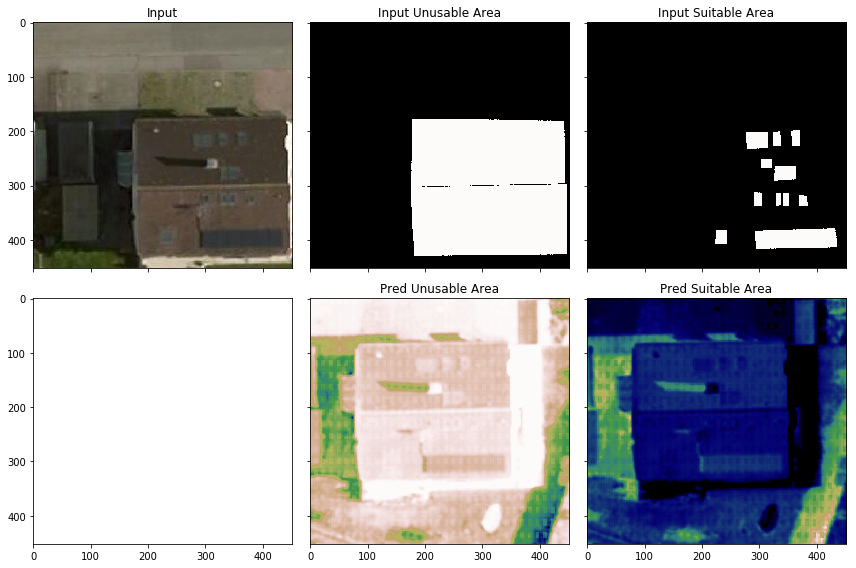

In [15]:
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
ax[0, 0].imshow(x_test[0,...], aspect="auto"); ax[0, 0].set_title("Input")
ax[0, 1].imshow(y_test[0,...,0], aspect="auto"); ax[0, 1].set_title("Input Unusable Area")
ax[0, 2].imshow(y_test[0,...,1], aspect="auto"); ax[0, 2].set_title("Input Suitable Area")

ax[1, 1].imshow(mask_1, aspect="auto"); ax[1, 1].set_title("Pred Unusable Area")
ax[1, 2].imshow(mask_2, aspect="auto"); ax[1, 2].set_title("Pred Suitable Area")

fig.tight_layout()
fig.savefig("nachbarstrom-evaluation.png")

In [34]:
a = mask_1, mask_2, np.zeros(mask_1.shape)

In [35]:
b = np.stack(a, axis=2)

In [36]:
b.shape

(452, 452, 3)

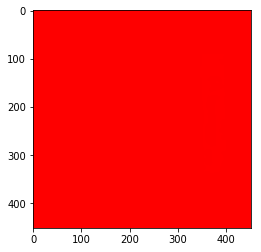

In [37]:
plt.imshow(b)

In [38]:
mask_1.min(), mask_1.max()

(0.9995369, 1.0)

In [39]:
mask_2.min(), mask_2.max()

(7.509019e-09, 0.00046312355)

In [40]:
mask_1.sum(), mask_2.sum()

(204292.1, 11.901583)

In [44]:
np.multiply(*b.shape[:2])

204304

In [45]:
np.sum(mask_1 + mask_2)

204304.0